In [28]:
import uproot
import numpy as np #math and science package
import scipy as sp #math and science package
import awkward as ak #root files are usuallt awkward arrays 
import matplotlib.pyplot as plt #plot stuff

from my_functions import invariant_mass_all_muons
from my_functions import invariant_mass
from my_functions import quality_locator
from my_functions import quality_selector
from my_functions import high_quality_histogram2
from my_functions import histogram2errors

In [29]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

Zmumu_data=MuonTree_Zmumu["muon_e"].array()

MuonTree_Zmumu=file["MuonTree_Zmumu;1"] 

eta=MuonTree_Zmumu["muon_eta"].array()
phi=MuonTree_Zmumu["muon_phi"].array()
pt=MuonTree_Zmumu["muon_pt"].array()

Z_mass=invariant_mass_all_muons(pt,eta,phi) #computes the invariant mass vector


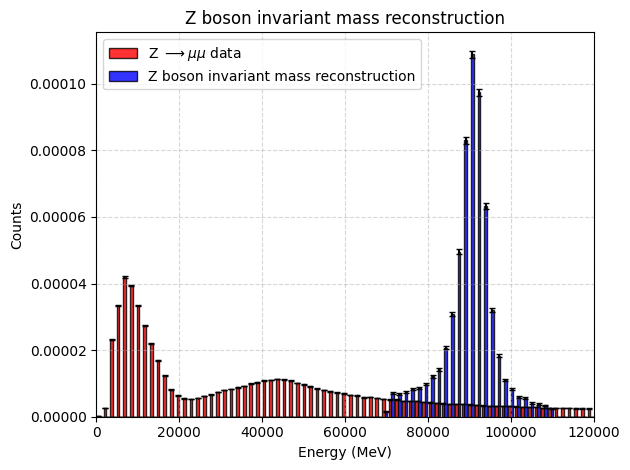

In [30]:
nbins=75
x_range=[0,1.2*10**5]
x_label=r"Energy (MeV)"
y_label="Counts"
title_label=r"Z boson invariant mass reconstruction"
label1=r'Z $\longrightarrow \mu \mu$ data'
label2='Z boson invariant mass reconstruction'

histogram2errors(Zmumu_data, Z_mass, nbins, x_range,  x_label, y_label, title_label, label1, label2)

Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected
Only 21.265 % of the data has been selected


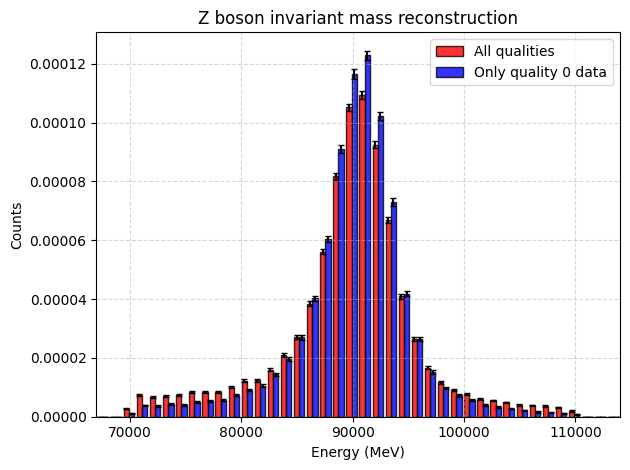

In [31]:
#Now let's make the plot using quality=0 data.

file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

data1=MuonTree_Zmumu["muon_quality"].array() #save the quality vector
value=0 #set desired quality to 0

#Select quality 0 data for pt, eta and phi

data2=MuonTree_Zmumu["muon_pt"].array()
pt=quality_selector(data1,data2,value)
data2=MuonTree_Zmumu["muon_eta"].array()
eta=quality_selector(data1,data2,value)
data2=MuonTree_Zmumu["muon_phi"].array()
phi=quality_selector(data1,data2,value)

#Compute the Z peak for the quality 0 data

Z_mass_high_quality=invariant_mass_all_muons(pt,eta,phi)

#Plot the Z peak for quality 0 compared with the Z peak using all qualities

nbins=40
x_range=[6.7*10**4,11.4*10**4]
x_label=r"Energy (MeV)"
y_label="Counts"
title_label=r"Z boson invariant mass reconstruction"
label1=r'All qualities'
label2='Only quality 0 data'

histogram2errors(Z_mass, Z_mass_high_quality, nbins, x_range,  x_label, y_label, title_label, label1, label2)